In [15]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

### ======================================================================
npth='J:/Reanalysis/myOISST_198001_202212_sst.nc'

myEEMD_pth='C:/Users/shjo/OneDrive/mySO/EEMD_sigs/OHC700_1993_2020_200E220E_60S53S/Figs/'

wpth='C:/Users/shjo/OneDrive/mySO/Regression_H/'

ModeN=5
varnm='ice'
t_rng=['1993-01', '2017-12']
lat_rng=[-75,-30]; lon_rng=[0,360]
ㅓㅛㅗㄱㅁㄴㄱㅎDRFG쏘


In [16]:
### =======================================================================
with open(myEEMD_pth+'EEMD_'+f'{ModeN:02d}'+'_mode.pickle', 'rb') as f:
    data = pickle.load(f)
Esig9317=data.mean(axis=1).loc[t_rng[0]:t_rng[-1]].values

### Preparation ============================================================
wpth=wpth+varnm+'_'+str(t_rng[0][:4])+'_'+str(t_rng[-1][:4])+'_'+\
    str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+'_'+str(lon_rng[0])+\
        'E'+str(lon_rng[-1])+'E'+'_'+f'{ModeN:02d}'+'mode'+'/'
wpth=wpth.replace('-','')
try :
    os.mkdir(wpth)
    loc=sys._getframe().f_code.co_filename
    myInfo(loc,wpth)
except:
    raise

myDATA=[npth]
# myRnly=[pthrn+i for i in os.listdir(pthrn) if i.endswith('.nc')]
# myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]
# myDATA=myMDOB+myRnly
# if int(t_rng[0].split('-')[0])<1992:
#     myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]

!!! Open: J:/Reanalysis/myOISST_198001_202212_sst.nc !!!
OISST_ice_regression_imf05_75S30S_0E360E_1993_2017
OISST ice regression (imf05)
0~360E 1993 2017
!!! linregress !!!
OISST_ice_regression_imf05_75S30S_0E360E_1993_2017


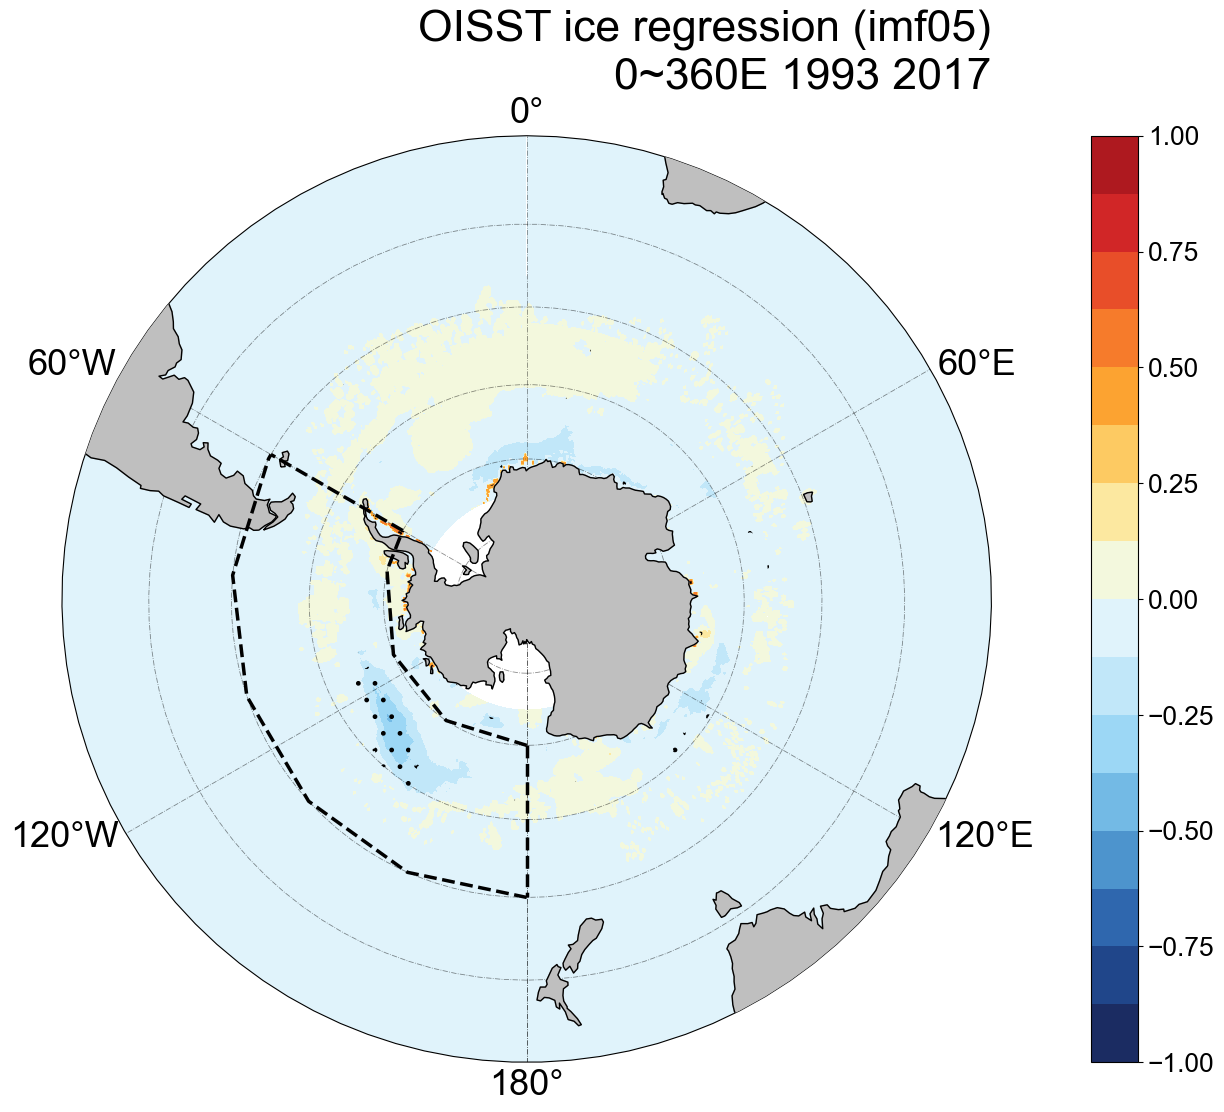

In [17]:
### Read Data ==============================================================
for i in myDATA: 
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)
    if len(tmp.coords)==3:
        mydata = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
            ,time=slice(t_rng[0],t_rng[-1]))]

    mydata=mydata.where(mydata<1000)
    
    mydata=mydata.fillna(0)
    
    lonR,latR=mydata.lon.values,mydata.lat.values
    lonR_m,latR_m=np.meshgrid(lonR,latR)
    time=mydata.time.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' regression (imf'+f'{ModeN:02d}'+')\n'+\
        str(lon_rng[0])+'~'+str(lon_rng[-1])+'E '+str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' regression imf'+f'{ModeN:02d}_'+\
        str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+' '+str(lon_rng[0])+'E'+str(lon_rng[-1])+'E_'+\
            str(time[0])[:4]+' '+str(time[-1])[:4]
    
    dta_snm=dta_snm.replace(' ','_').replace('salt','salinity').replace('-','')
    dta_nm=dta_nm.replace('salt','salinity').replace('-','')
    print(dta_snm)
    print(dta_nm)
    
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    # plt.figure()
    # plt.scatter(range(300),mydata[:,30,20])
    # plt.show()
    # raise
    slope,intercept,r_value,p_value,std_err,smask=myRegress3d_sttcs(Esig9317,mydata,threshold=0.01)
    # CoefD=slope*10**10 # Decadal^-1
    CoefD=slope*10**9/2 # Decadal^-1
    
    smask[CoefD==0]=np.nan
    ### Figure configs =======================================================
    # myCoefs.append(CoefD); myNm.append(dta_nm); myLat.append(latR)
    # raise
    
    myN=16
    mylim=[-1.,1.]
    CMAP,mylevel=myClrbr('myblc2',mylim,myN)
    CMAP_salt,mylevel_salt=myClrbr('salt',mylim,myN)
    CMAP_temp,mylevel_temp=myClrbr('balance',mylim,myN)

    CoefD[CoefD<mylim[0]]=mylim[0]
    CoefD[CoefD>mylim[-1]]=mylim[-1]
    
    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':18,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':wpth}
    
    lat_rng_,lon_rng_=[-70,-50],[180,300]

    F=figmaster(mySetting)
    print(dta_snm)
    F.myCrtpy_sph3_box(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm,dta_snm,lat_rng_,lon_rng_)

    

OISST_ice_regression_imf05_75S30S_0E360E_1993_2017


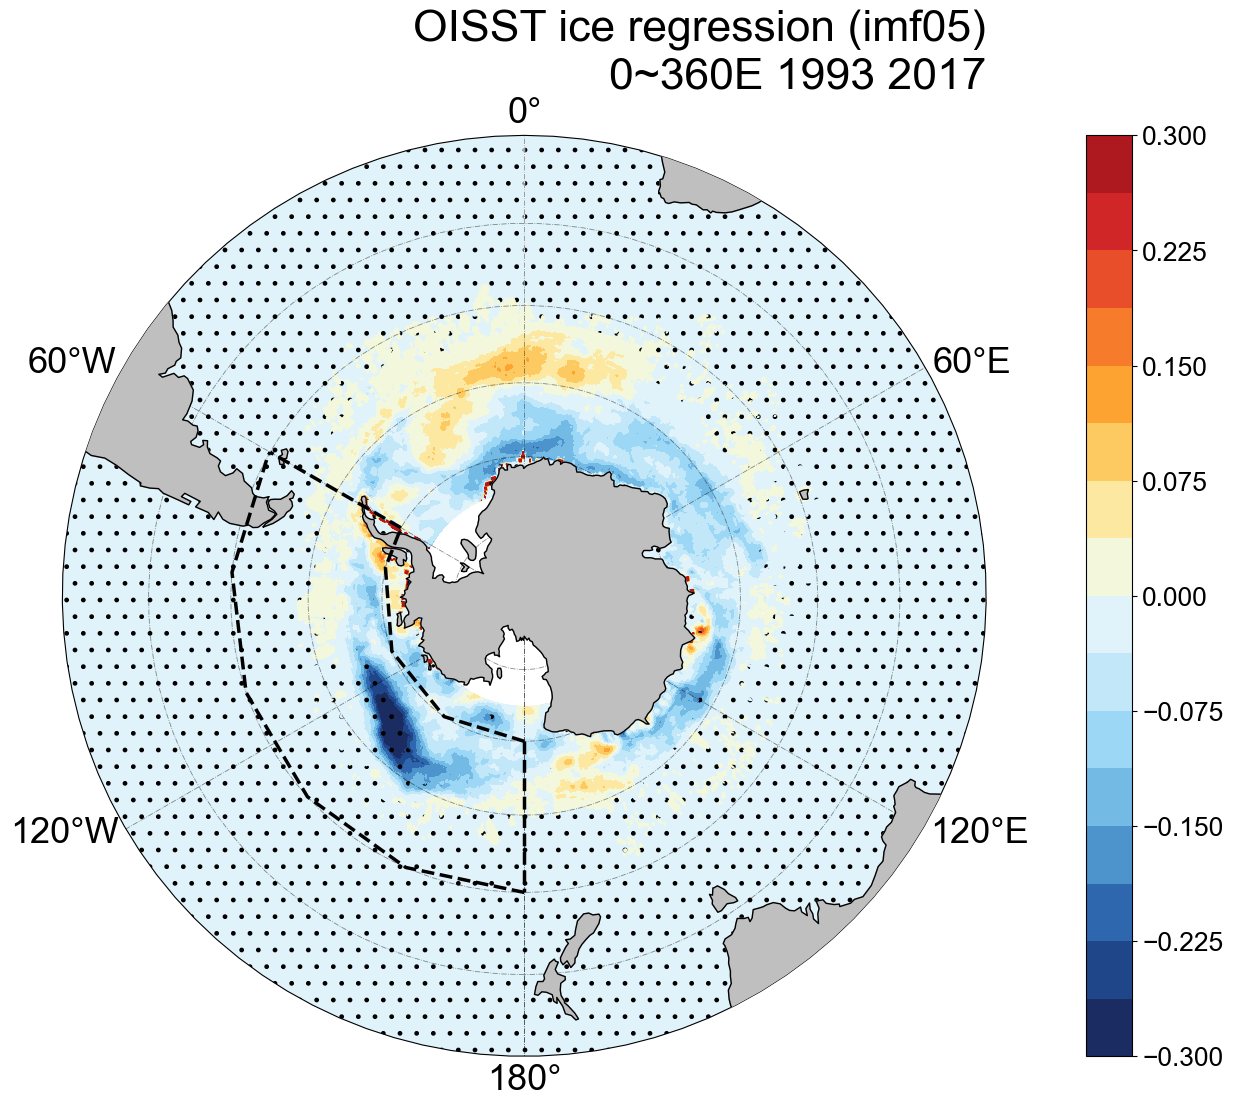

In [12]:
myN=16
mylim=[-.3,.3]
CMAP,mylevel=myClrbr('myblc2',mylim,myN)
CMAP_salt,mylevel_salt=myClrbr('salt',mylim,myN)
CMAP_temp,mylevel_temp=myClrbr('balance',mylim,myN)

CoefD[CoefD<mylim[0]]=mylim[0]
CoefD[CoefD>mylim[-1]]=mylim[-1]

mySetting={
    'figsize': '',
    'mylabel': '',
    'Label_size':18,
    'title_loc':'right',
    'fontParams':'Arial',
    'wpth':wpth}

lat_rng_,lon_rng_=[-70,-50],[180,300]

F=figmaster(mySetting)
print(dta_snm)
F.myCrtpy_sph3_box(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm,dta_snm,lat_rng_,lon_rng_)

In [13]:
CoefD

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

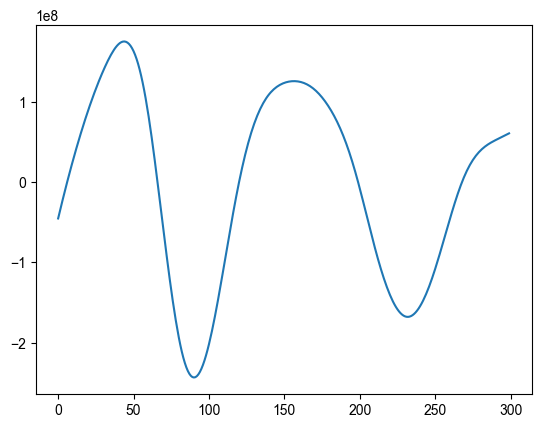

In [19]:
plt.plot(Esig9317)